# Système de Contrôle Flou – Température et Vitesse

Ce notebook illustre un exemple simple d’un **système de logique floue** implémenté avec la bibliothèque **`scikit-fuzzy` (`skfuzzy`)**.  
L’objectif est de déterminer la **vitesse d’un ventilateur** en fonction de la **température ambiante**, selon des règles floues.

---

## 1. Importation des bibliothèques nécessaires

On importe les modules nécessaires :
- `numpy` pour la manipulation des tableaux numériques.
- `skfuzzy` pour les fonctions floues et les contrôleurs.
- `skfuzzy.control` pour la création du système de contrôle flou.


In [7]:
from skfuzzy import control as ctrl
import numpy as np 
import skfuzzy as fuzz 

## 2. Définition des variables floues

###  Variables d’entrée (Antecedent)
- **Température** : varie entre 10°C et 50°C.  
  Elle comporte trois ensembles flous :
  - `froid` → entre 0 et 20°C  
  - `agréable` → entre 15 et 30°C  
  - `chaud` → entre 27 et 50°C  

### 🔹 Variable de sortie (Consequent)
- **Vitesse** du ventilateur : varie entre 0% et 100%.  
  Elle comporte trois ensembles flous :
  - `faible`  
  - `moyenne`  
  - `élevée`

Les fonctions d’appartenance (membership functions) sont définies à l’aide de **triangles (`trimf`)**.


In [8]:
temperature  = ctrl.Antecedent(np.arange(10,50,1),"temperature")
vitesse = ctrl.Consequent(np.arange(0,100,1),"vitesse")
vitesse.automf(names = ["faible","moyenne","eleve"])
temperature["froid"] = fuzz.trimf(temperature.universe, [0,10,20])
temperature["agreable"] = fuzz.trimf(temperature.universe, [15,25,30])
temperature["chaud"] = fuzz.trimf(temperature.universe, [27,50,50])
vitesse["faible"] = fuzz.trimf(vitesse.universe, [0,0,40])
vitesse["moyenne"] = fuzz.trimf(vitesse.universe, [30,50,70])
vitesse["eleve"] = fuzz.trimf(vitesse.universe, [60,100,100])



## 3. Visualisation des fonctions d’appartenance

La méthode `.view()` permet d’afficher les fonctions d’appartenance de chaque variable.  
Cela permet de visualiser comment les valeurs sont floutées dans leurs catégories respectives.


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


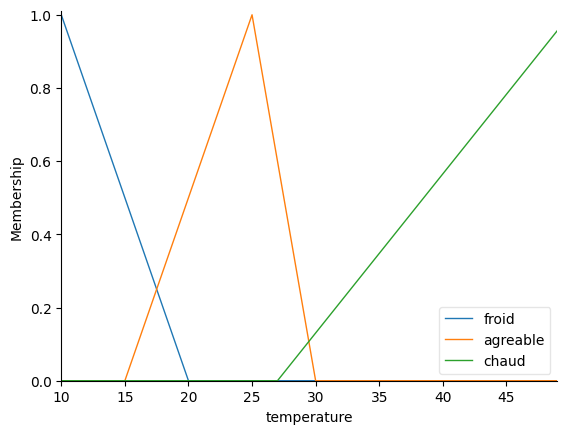

In [9]:
temperature.view()

## 4. Définition des règles floues

Trois **règles d’inférence** sont définies :

1. Si la température est **froide**, alors la vitesse est **faible**.  
2. Si la température est **agréable**, alors la vitesse est **moyenne**.  
3. Si la température est **chaude**, alors la vitesse est **élevée**.

Ces règles traduisent le raisonnement humain en un modèle flou interprétable.


In [10]:
rule1 = ctrl.Rule( temperature['froid'], vitesse['faible'])
rule2 = ctrl.Rule( temperature['agreable'], vitesse['moyenne'])
rule3 = ctrl.Rule(temperature['chaud'], vitesse['eleve'])

## 5. Création du système de contrôle flou

Les règles sont regroupées dans un objet `ControlSystem`,  
qui représente le moteur logique flou complet :

```python
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [11]:
#regrouper toutes les règles floues pour créer un système flou complet.
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# permet de donner des valeurs d’entrée réelles et de calculer la sortie correspondante.
vitesse_simulator= ctrl.ControlSystemSimulation(vitesse_ctrl)
vitesse_simulator.defuzzyfy_method = 'mom'
# vitesse_simulator.defuzzyfy_method = 'centroid'
#Saisie des valeurs de température
vitesse_simulator.input['temperature'] = 18

#Résultat calculé
vitesse_simulator.compute()
print(vitesse_simulator.output['vitesse'])

36.90548014077421



---

```markdown
## 8. Visualisation du résultat final

L’appel de :
vitesse.view(sim=vitesse_simulator)
temperature.view(sim=vitesse_simulator)


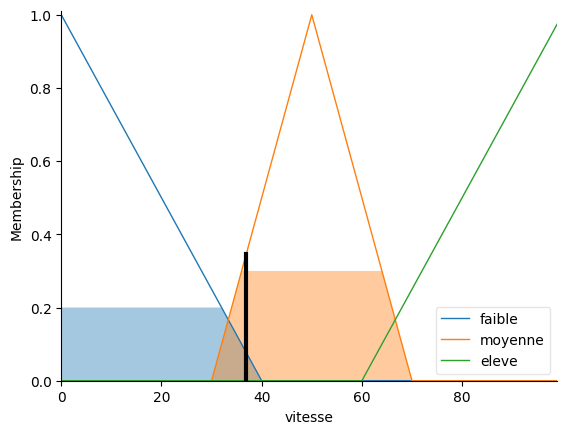

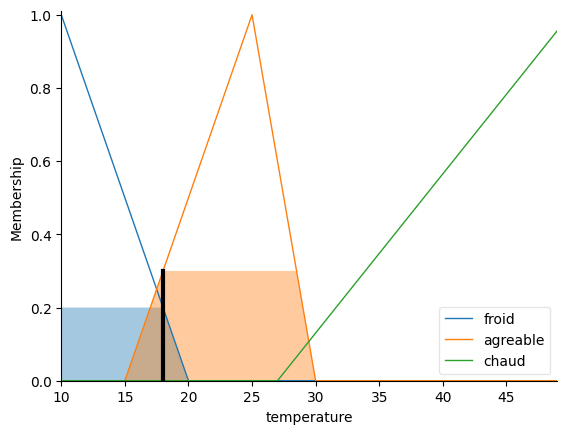

In [12]:
#En ajoutant sim=.., on indique que le graphique doit montrer la valeur d’entrée actuelle et l’effet sur la sortie.
vitesse.view(sim=vitesse_simulator)
temperature.view(sim=vitesse_simulator)


---

```markdown
## Résumé

| Étape | Description |
|-------|--------------|
| 1 | Définition des variables floues (température, vitesse) |
| 2 | Création des fonctions d’appartenance |
| 3 | Définition des règles floues |
| 4 | Création du système de contrôle |
| 5 | Simulation avec une valeur d’entrée |
| 6 | Visualisation du résultat |

Ainsi, ce système flou simule le comportement d’un **ventilateur intelligent**  
capable d’ajuster sa vitesse automatiquement selon la température détectée.
